# DESCRIPTION

Identify the level of income qualification needed for the families in Latin America.

# Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.
Following actions should be performed:

Identify the output variable.
Understand the type of data.
Check if there are any biases in your dataset.
Check whether all members of the house have the same poverty level.
Check if there is a house without a family head.
Set poverty level of the members and the head of the house within a family.
Count how many null values are existing in columns.
Remove null value rows of the target variable.
Predict the accuracy using random forest classifier.
Check the accuracy using random forest with cross validation.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [68]:
train = pd.read_csv(r'C:\Users\SAIRAM\Desktop\Simplilearn_Practice\Machine Learning\Project\train.csv')

### Identify the output variable

In [69]:
for c in train.columns:
    if c not in test.columns:
        print('Output/Target variable is {}'.format(c))

Output/Target variable is Target


### Understand the type of data

In [70]:
print('shape of train dataset is {}'.format(train.shape))
print('shape of test dataset is  {}'.format(test.shape))

shape of train dataset is (9557, 143)
shape of test dataset is  (23856, 142)


<b> Test data is more than train data :)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [72]:
#Object type variables available
train.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [73]:
#float64 type variables available
train.select_dtypes('float64').columns

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')

### Count how many null values are existing in columns 

In [74]:
missing_perc = train.isnull().mean()
cols_to_ignore = []
cols_to_ignore = list(missing_perc[missing_perc > 0.3].index)

#### Features v2a1: Monthly rent payment, v18q1: number of tablets household owns &  rez_esc: Years behind in school are having more 70% of missing values 

In [75]:
cols_to_ignore
#add the ID column also as we can get rid of the same
cols_to_ignore.append('Id')
cols_to_ignore

['v2a1', 'v18q1', 'rez_esc', 'Id']

In [76]:
print('shape before dropping is {}'.format(train.shape))
#train = train.drop(cols_to_ignore, axis=1)
print('shape after  dropping is {}'.format(train.shape))

shape before dropping is (9557, 143)
shape after  dropping is (9557, 143)


In [77]:
missing_perc1 = train.isnull().mean()
missing_perc1[missing_perc1 > 0]

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

In [78]:
train['meaneduc'] = train['meaneduc'].fillna(train['meaneduc'].mean())
train['SQBmeaned'] = train['SQBmeaned'].fillna(train['SQBmeaned'].mean())

In [79]:
missing_perc2 = train.isnull().mean()
missing_perc2[missing_perc2 > 0]

v2a1       0.717798
v18q1      0.768233
rez_esc    0.829549
dtype: float64

#### No null values in train dataset

### Remove null value rows of the target variable

In [80]:
train['Target'].isnull().sum()

0

##### No null values in the feature Target

In [81]:
print(train.dtypes.value_counts())

int64      130
float64      8
object       5
dtype: int64


In [82]:
train.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [83]:
#idhogar - Household level identifier
#print(train['idhogar'].nunique())
#print(train['idhogar'].value_counts())

# since there are 2988 unique values, we cannot encode them - Better to drop this feature
#train = train.drop('idhogar', axis=1)
cols_to_ignore.append('idhogar')
cols_to_ignore

['v2a1', 'v18q1', 'rez_esc', 'Id', 'idhogar']

In [84]:
#dependency
print(train['dependency'].nunique())
print(train['dependency'].value_counts())

#There are strings 'yes' & 'no' in the dependency field..need to replace them with 1 or 0

31
yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
.22222222      11
.83333331      11
1.2            11
.2857143        9
.60000002       8
1.6666666       8
6               7
.16666667       7
Name: dependency, dtype: int64


In [85]:
def fill_missing(val):
    if val == 'yes':
        return(float(1))
    elif val == 'no':
        return(float(0))
    else:
        return(float(val))
    

In [86]:
train['dependency'] = train['dependency'].apply(fill_missing)
train['dependency'].value_counts()

1.000000    2192
0.000000    1747
0.500000    1497
2.000000     730
1.500000     713
0.333333     598
0.666667     487
8.000000     378
0.250000     260
3.000000     236
4.000000     100
0.750000      98
0.200000      90
0.400000      84
1.333333      84
2.500000      77
5.000000      24
3.500000      18
0.800000      18
1.250000      18
2.250000      13
0.714286      12
1.200000      11
0.833333      11
0.222222      11
1.750000      11
0.285714       9
0.600000       8
1.666667       8
6.000000       7
0.166667       7
Name: dependency, dtype: int64

In [87]:
train['dependency'].dtype

dtype('float64')

In [88]:
#edjefe: years of education of male head of household, based on the interaction of
#escolari (years of education), head of household and gender, yes=1 and no=0

print(train['edjefe'].nunique())
print(train['edjefe'].dtype, train['edjefa'].value_counts())
train['edjefe'] = train['edjefe'].apply(fill_missing)
#train['edjefe'].astype('float64')

#edjefa: years of education of female head of household, based on the interaction of
#escolari (years of education), head of household and gender, yes=1 and no=0

print(train['edjefa'].nunique())
print(train['edjefa'].dtype, train['edjefa'].value_counts())
train['edjefa'] = train['edjefa'].apply(fill_missing)
#train['edjefa'].astype('float64')

22
object no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64
22
object no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


##### Now all features have numerical values only

In [90]:
var_df = pd.DataFrame(np.var(train), columns=['Variance'])
var_df = var_df.sort_values('Variance')
var_df[var_df['Variance'] == 0.0]

,Variance
elimbasu5,0.0


In [91]:
## feature elimbasu5 is having 0 variance - no explainability
# elimbasu5 "=1 if rubbish disposal mainly by throwing in river, creek or sea"
train['elimbasu5'].value_counts()

# We can drop this feature as this has zero variance
train = train.drop('elimbasu5', axis=1)

In [92]:
print('shape of after dropping unwanted columns - ', train.shape)

shape of after dropping unwanted columns -  (9557, 142)


#### Check if there are any biases in your dataset.

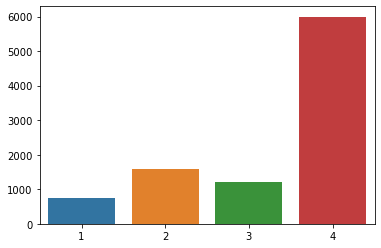

In [93]:
sns.barplot([4,2,3,1],list(train['Target'].value_counts()))
plt.show()

##### Target is the outcome variable. Dataset is biased as we have more number of observations for the target == 4

## Check whether all members of the house have the same poverty level.

In [94]:
#idhogar -->Household level identifier --> feature to group family
train['idhogar'].value_counts()

fd8a6d014    13
0c7436de6    12
ae6cf0558    12
6b35cdcf0    11
4476ccd4c    11
             ..
bc10778dc     1
3d56274f9     1
69a27e88d     1
9f5fa0b28     1
99411766c     1
Name: idhogar, Length: 2988, dtype: int64

In [95]:
train[train['idhogar'] == 'fd8a6d014']['Target']
# for the family id: fd8a6d014, all the members have tagged to same poverty level

2467    1
2468    1
2469    1
2470    1
2471    1
2472    1
2473    1
2474    1
2475    1
2476    1
2477    1
2478    1
2479    1
Name: Target, dtype: int64

In [96]:
unique_idhogar = list(train['idhogar'].unique())
unique_idhogar[0:10]

['21eb7fcc1',
 '0e5d7a658',
 '2c7317ea8',
 '2b58d945f',
 'd6dae86b7',
 'bb2094100',
 'c51f9c774',
 '6893e65ca',
 'd29058053',
 'ec0e8edce']

In [97]:
for id in unique_idhogar:
    if train[train['idhogar'] == id]['Target'].nunique() == 1:
        continue
        #print('Idhogar {} has same poverty level of {}'.format(id, train[train['idhogar'] == id]['Target'] ))
    else:
        print('Idhogar {} has different poverty level of {}'.format(id, list(train[train['idhogar'] == id]['Target'])))

Idhogar 4b6077882 has different poverty level of [1, 2, 2]
Idhogar 6833ac5dc has different poverty level of [2, 2, 2, 2, 2, 1]
Idhogar 43b9c83e5 has different poverty level of [2, 2, 2, 2, 1, 2]
Idhogar 5c3f7725d has different poverty level of [3, 3, 3, 3, 2, 2, 3]
Idhogar 0f9494d3a has different poverty level of [2, 2, 3, 3, 3]
Idhogar daafc1281 has different poverty level of [2, 3, 3, 3]
Idhogar 73d85d05d has different poverty level of [2, 3]
Idhogar bcaa2e2f5 has different poverty level of [4, 3, 4]
Idhogar 44f219a16 has different poverty level of [3, 2, 3, 3, 3]
Idhogar efd3aec61 has different poverty level of [2, 3, 2, 3, 2]
Idhogar 3c6973219 has different poverty level of [4, 4, 2, 4]
Idhogar 0511912b6 has different poverty level of [4, 4, 4, 3]
Idhogar f006348ed has different poverty level of [3, 3, 2, 2, 2]
Idhogar a20ff33ba has different poverty level of [2, 1, 2, 2]
Idhogar 5e9329fc6 has different poverty level of [3, 2, 3]
Idhogar e65d4b943 has different poverty level of [3,

##### Above family have members with different poverty level

### Check if there is a house without a family head.

In [98]:
# parentesco1, =1 if household head
train['parentesco1'].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [99]:
a = train['parentesco1'].groupby(train['idhogar']).sum()

In [100]:
(a[a.values == 0])

idhogar
03c6bdf85    0
09b195e7a    0
1367ab31d    0
1bc617b23    0
374ca5a19    0
61c10e099    0
6b1b2405f    0
896fe6d3e    0
a0812ef17    0
ad687ad89    0
b1f4d89d7    0
bfd5067c2    0
c0c8a5013    0
d363d9183    0
f2bfa75c4    0
Name: parentesco1, dtype: int64

#### Above are the 15 families without head

### Set poverty level of the members and the head of the house within a family.

In [101]:
#v2a1 - rent paid - 71% empty - cannot use this feature
#tipovivi5, "=1 other(assigned, borrowed)"
#rooms, number of all rooms in the house
#r4t3, Total persons in the household
#pisonotiene, =1 if no floor at the household
#abastaguano, =1 if no water provision
#noelec, =1 no electricity in the dwelling
#sanitario1, =1 no toilet in the dwelling
#energcocinar1, =1 no main source of energy used for cooking (no kitchen)


In [102]:
print(train['tipovivi5'].value_counts())
print(train['pisonotiene'].value_counts())
print(train['abastaguano'].value_counts())
print(train['noelec'].value_counts())
print(train['sanitario1'].value_counts())
print(train['energcocinar1'].value_counts())


0    8771
1     786
Name: tipovivi5, dtype: int64
0    9400
1     157
Name: pisonotiene, dtype: int64
0    9523
1      34
Name: abastaguano, dtype: int64
0    9536
1      21
Name: noelec, dtype: int64
0    9520
1      37
Name: sanitario1, dtype: int64
0    9539
1      18
Name: energcocinar1, dtype: int64


In [103]:
print(train['tipovivi5'].value_counts())
print(train['rooms'].value_counts().sort_values())

print('# of members in borrowed house with less than equal to 2 rooms:', len(train[(train['tipovivi5'] == 0) & (train['rooms'] == 1)]))
#251 members are in borrowed house that has two or one bed room



0    8771
1     786
Name: tipovivi5, dtype: int64
11       7
10      43
1       97
9      168
2      188
8      298
7      732
3      890
6     1607
4     2587
5     2940
Name: rooms, dtype: int64
# of members in borrowed house with less than equal to 2 rooms: 78


In [104]:
# Below function has been loaded with rules to define the 'below poverty limit'
def poverty_limit(cols):
    
    w_tipovivi5     = cols[0]
    w_pisonotiene   = cols[1]
    w_abastaguano   = cols[2]
    w_noelec        = cols[3]
    w_sanitario1    = cols[4]
    w_energcocinar1 = cols[5]
    w_rooms         = cols[6]
    
    if (w_tipovivi5 == 1) & (w_rooms == 1):
        return('Below Poverty')
    elif w_pisonotiene == 1:
        return('Below Poverty')
    elif w_abastaguano == 1:
        return('Below Poverty')
    elif w_noelec == 1:
        return('Below Poverty')
    elif w_sanitario1 == 1:
        return('Below Poverty')
    elif w_energcocinar1 == 1:
        return('Below Poverty')    

In [105]:
train['poverty_limit'] = train[['tipovivi5', 'pisonotiene', 'abastaguano', 'noelec', 'sanitario1', 'energcocinar1', 'rooms']].apply(poverty_limit, axis=1)

In [106]:
train['poverty_limit'].value_counts()

Below Poverty    248
Name: poverty_limit, dtype: int64

#### 248 members are categorized under below poverty limit based on the rules defined in the function poverty_limit

## Predict the accuracy using random forest classifier

In [107]:
cols_to_ignore.append('poverty_limit')
cols_to_ignore

['v2a1', 'v18q1', 'rez_esc', 'Id', 'idhogar', 'poverty_limit']

In [108]:
train = train.drop(cols_to_ignore, axis=1)

X = train.drop('Target', axis=1)
Y = train['Target']
print(X.shape, Y.shape)

(9557, 136) (9557,)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7645, 136) (7645,)
(1912, 136) (1912,)


### Trial1: Default model

In [110]:
rfclr = RandomForestClassifier(random_state=17)
rfclr.fit(X_train, y_train)
print('train accuracy is {}'.format(rfclr.score(X_train, y_train)))
print('test  accuracy is {}'.format(rfclr.score(X_test, y_test)))

train accuracy is 1.0
test  accuracy is 0.9095188284518828


###### Test accuracy is 10% less than train accuracy - slight sign of overfit

### Trial2: Standardize the data and fit the model

In [111]:
X

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0,3,0,1,1,0,0,1,1,0,...,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849
1,0,4,0,1,1,1,0,1,1,0,...,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489
2,0,8,0,1,1,0,0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464
3,0,5,0,1,1,1,0,2,2,1,...,17,81,289,16,121,4,1.777778,1.0000,121.0000,289
4,0,5,0,1,1,1,0,2,2,1,...,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,...,46,81,2116,25,81,1,1.562500,0.0625,68.0625,2116
9553,0,6,0,1,1,0,0,2,2,1,...,2,0,4,25,81,1,1.562500,0.0625,68.0625,4
9554,0,6,0,1,1,0,0,2,2,1,...,50,25,2500,25,81,1,1.562500,0.0625,68.0625,2500
9555,0,6,0,1,1,0,0,2,2,1,...,26,121,676,25,81,1,1.562500,0.0625,68.0625,676


In [112]:
sc = StandardScaler()
temp_X = sc.fit_transform(X)

In [113]:
X = pd.DataFrame(temp_X, columns=X.columns)
Y = train['Target']
print(X.shape, Y.shape)

(9557, 136) (9557,)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7645, 136) (7645,)
(1912, 136) (1912,)


In [115]:
rfclr1 = RandomForestClassifier(random_state=17)
rfclr1.fit(X_train, y_train)
print('train accuracy is {}'.format(rfclr1.score(X_train, y_train)))
print('test  accuracy is {}'.format(rfclr1.score(X_test, y_test)))

train accuracy is 1.0
test  accuracy is 0.9089958158995816


#### No change in test accuracy before and after standarizing

## Trial3 - K-Fold method

In [116]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=17)
rfclr2 = RandomForestClassifier(random_state=17)
rf_results = model_selection.cross_val_score(rfclr2, X, Y, cv=kfold)

In [117]:
rf_results

array([0.92364017, 0.93410042, 0.92782427, 0.92991632, 0.92259414,
       0.94665272, 0.92677824, 0.93403141, 0.9486911 , 0.94031414])

In [118]:
print('Test accuracy is {}'.format(rf_results.mean()))

Test accuracy is 0.9334542925365288


### Trial4 - Use Grid search CV to tune the hyperparameters

In [119]:
param_grid = {
   'n_estimators' : [100, 150, 200, 250],
    'max_depth'   : [None, 1, 2, 3, 4, 5, 6],
    'min_samples_leaf' : [1,2,3,4,5,6]
}

In [120]:
rfclr3 = RandomForestClassifier(random_state=17)

In [121]:
gs = GridSearchCV(rfclr3, param_grid=param_grid, cv=3, verbose=2)

In [122]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=250; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=250; total time=   1.5s
[CV] END max_depth=None, min_sample

[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=150; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=150; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=250; total time=   0.3s
[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=250; total time=   0.3s
[CV] END ..max_depth=1, min_samples_leaf=3, n_estimators=250; total time=   0.3s
[CV] END ..max_depth=1, min_samples_leaf=4, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=4, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=4, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=4, n_estimators=150; total time=   0.1s
[CV] END ..max_depth=1, min_

[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=250; total time=   0.4s
[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=250; total time=   0.4s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=150; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=150; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=150; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=2, min_samples_leaf=6, n_estimators=250; total time=   0.4s
[CV] END ..max_depth=2, min_

[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=250; total time=   0.5s
[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=250; total time=   0.5s
[CV] END ..max_depth=4, min_samples_leaf=2, n_estimators=250; total time=   0.5s
[CV] END ..max_depth=4, min_samples_leaf=3, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=4, min_samples_leaf=3, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=4, min_samples_leaf=3, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=4, min_samples_leaf=3, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=4, min_

[CV] END ..max_depth=5, min_samples_leaf=4, n_estimators=250; total time=   0.6s
[CV] END ..max_depth=5, min_samples_leaf=4, n_estimators=250; total time=   0.6s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=250; total time=   0.6s
[CV] END ..max_depth=5, min_

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [123]:
gs.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 250}

In [124]:
gs.best_score_

0.8756048636674092

In [125]:
y_pred = gs.predict(X_test)

In [126]:
metrics.accuracy_score(y_test, y_pred)

0.9079497907949791

##### Random forest classifier with Grid search CV 
###### best_param: max_depth: None, min_samples_leaf:1 and tress: 250 
###### Test accuracy is 90.8%

### FINAL: Use the best parameters found using Gridsearch and use cross validation

In [127]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=17)
rfclr4 = RandomForestClassifier(random_state=17, n_estimators=250, min_samples_leaf=1, max_depth=None)
rf_results_2 = model_selection.cross_val_score(rfclr4, X, Y, cv=kfold)

In [128]:
rf_results_2

array([0.92573222, 0.92991632, 0.92468619, 0.93305439, 0.91945607,
       0.94037657, 0.92677824, 0.93298429, 0.9486911 , 0.94031414])

In [129]:
print('Test Accuracy of Random forest classifier is ', rf_results_2.mean())

Test Accuracy of Random forest classifier is  0.9321989528795811


In [159]:
rfclr4.fit(X_train, y_train)
print('Train accuracy is {}'.format(rfclr4.score(X_train, y_train)))
print('Test  accuracy is {}'.format(rfclr4.score(X_test, y_test)))

Train accuracy is 1.0
Test  accuracy is 0.9079497907949791


### Plot the feature importance graph

In [186]:
feature_imp = rfclr4.feature_importances_
#print(type(feature_imp))
feature_imp

array([2.02536958e-03, 1.99709501e-02, 1.27269951e-03, 5.39301245e-04,
       3.58410903e-03, 1.00808765e-02, 9.64514666e-03, 1.54878036e-02,
       1.52428314e-02, 1.17761803e-02, 1.24711403e-02, 1.50270118e-02,
       1.55519070e-02, 1.51643886e-02, 1.04334875e-02, 1.03829568e-02,
       1.17255530e-02, 1.57292304e-02, 1.01228335e-02, 1.10391285e-02,
       5.26668886e-03, 7.81267342e-03, 1.00966934e-03, 6.13267927e-03,
       6.93478112e-04, 1.28782700e-04, 7.48670998e-05, 1.04498417e-02,
       6.90930756e-03, 1.84984588e-05, 5.40382856e-05, 1.03239422e-03,
       4.18256295e-03, 1.62581351e-03, 1.01971831e-03, 3.33082931e-04,
       5.71135021e-06, 1.64024074e-02, 2.13183042e-03, 1.70155235e-03,
       4.19951834e-04, 4.64325604e-03, 1.45835473e-05, 1.34983781e-04,
       4.86143955e-03, 3.23251035e-04, 5.25408701e-03, 5.87320114e-03,
       1.53193243e-03, 2.93990004e-04, 3.53811839e-04, 7.56386321e-03,
       8.15999890e-03, 4.25831564e-03, 5.04248293e-03, 1.91751335e-03,
      

In [175]:
feature_imp.shape

(136,)

In [182]:
ft = list(feature_imp)
cl = list(X.columns)

In [187]:
mapped = list(zip(ft, cl))

In [195]:
ft_imp_df = pd.DataFrame(mapped, columns=['Feature_imp_score', 'Feature_Name'])
ft_imp_df = ft_imp_df.sort_values('Feature_imp_score', ascending=False)

In [199]:
ft_imp_df[0:50]

,Feature_imp_score,Feature_Name
134,0.050307,SQBmeaned
97,0.050166,meaneduc
133,0.029074,SQBdependency
94,0.027571,dependency
108,0.024532,overcrowding
117,0.023782,qmobilephone
132,0.023629,SQBovercrowding
130,0.021845,SQBedjefe
95,0.021828,edjefe
1,0.019971,rooms


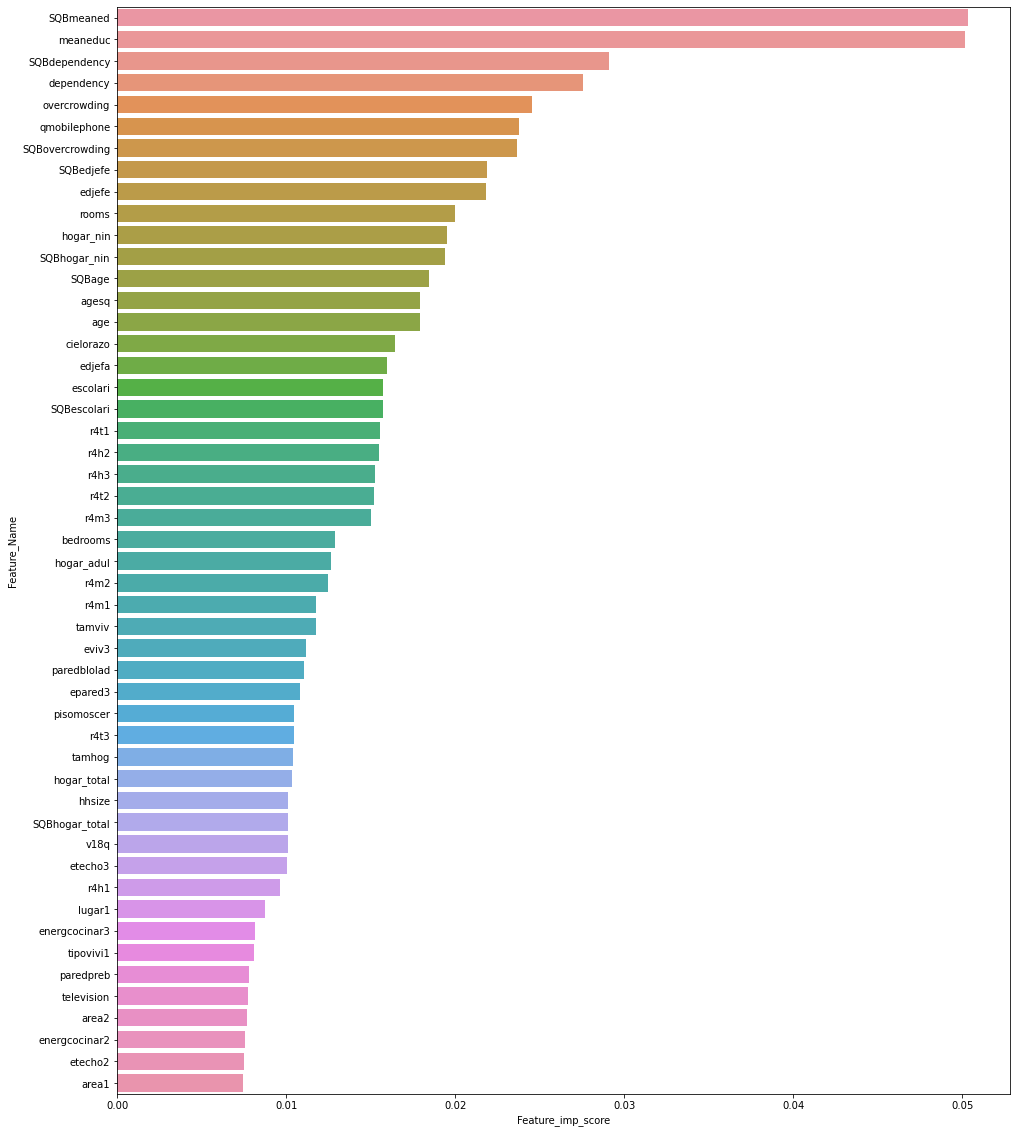

In [200]:
plt.figure(figsize=(16,20))
sns.barplot(ft_imp_df[0:50]['Feature_imp_score'], ft_imp_df[0:50]['Feature_Name'])
plt.show()

#### Predict the Test dataset

In [138]:
test  = pd.read_csv(r'C:\Users\SAIRAM\Desktop\Simplilearn_Practice\Machine Learning\Project\test.csv')

In [141]:
#Apply the transformations that were done for train dataset
print('shape of test file is ', test.shape)

#Remove the columns that were ignored during training phase
test = test.drop(['v2a1', 'v18q1', 'rez_esc', 'Id', 'idhogar'], axis=1)
print('shape of test file is ', test.shape)

shape of test file is  (23856, 142)
shape of test file is  (23856, 137)


In [145]:
#Fill missing values

missing_perc = test.isnull().mean()
missing_perc[missing_perc > 0]

test['meaneduc'] = test['meaneduc'].fillna(test['meaneduc'].mean())
test['SQBmeaned'] = test['SQBmeaned'].fillna(test['SQBmeaned'].mean())

missing_perc = test.isnull().mean()
missing_perc[missing_perc > 0]

Series([], dtype: float64)

In [148]:
#Object related features
test.select_dtypes('object').columns

Index(['dependency', 'edjefe', 'edjefa'], dtype='object')

In [149]:
test['dependency'] = test['dependency'].apply(fill_missing)
test['edjefe'] = test['edjefe'].apply(fill_missing)
test['edjefa'] = test['edjefa'].apply(fill_missing)

In [150]:
test.select_dtypes('object').columns

Index([], dtype='object')

In [153]:
#Drop the feature elimbasu5 as it has no variance
test['elimbasu5'].value_counts()
test = test.drop('elimbasu5', axis=1)

In [154]:
test.shape

(23856, 136)

#### Predict the target in test data set

In [161]:
test_pred = rfclr4.predict(test)
print(test_pred.shape, test.shape)

(23856,) (23856, 136)


In [162]:
test['Target'] = test_pred

In [163]:
test.iloc[1]

hacdor                0.00
rooms                 5.00
hacapo                0.00
v14a                  1.00
refrig                1.00
                    ...   
SQBovercrowding       2.25
SQBdependency         0.25
SQBmeaned           272.25
agesq              1681.00
Target                4.00
Name: 1, Length: 137, dtype: float64